In [1]:
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../input/ecommerce-data/data.csv", encoding="ISO-8859-1", dtype={'CustomerID': str})
df.iloc[:10]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047,United Kingdom


In [3]:
#Dropping null values as I cannot predict or fillna for sales data 
df.dropna(inplace=True)

# Countries with Most Customers

In [4]:
#Finding the countries with the most customers
uniqueCustomers = df.drop_duplicates(subset = 'CustomerID', keep = 'first')
countries = uniqueCustomers['Country'].value_counts()
dfCountries = countries.reset_index()
dfCountries.columns = ['Country', 'Customers']
dfCountries.head()

,Country,Customers
0,United Kingdom,3950
1,Germany,95
2,France,87
3,Spain,29
4,Belgium,24


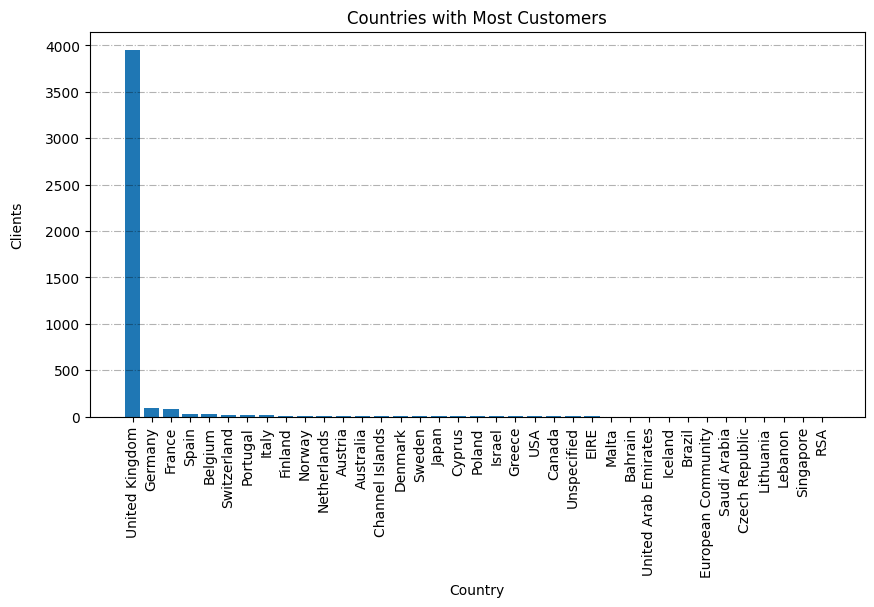

In [5]:
plt.figure(figsize=(10,5))
plt.bar(dfCountries['Country'], dfCountries['Customers'])
plt.title('Countries with Most Customers')
plt.xlabel('Country')
plt.xticks(rotation = 90)
plt.ylabel('Clients', labelpad = 15)
plt.grid(axis = 'y', linestyle = '-.', alpha = 0.3, color = 'black')
plt.show()

# Monthly Sales Trend

In [6]:
#Sales Trend
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

In [7]:
dfDateSum = df.groupby(pd.Grouper(key='InvoiceDate', freq='ME'))['Quantity'].sum()
'''This can also be used: 
dfDateSum = df.groupby(by='InvoiceDate')['Quantity'].sum()
dfMonth = dfDate_sum.resample('ME')
dfMonth.sum()
'''
dfDateSum

InvoiceDate
2010-12-31    296362
2011-01-31    269379
2011-02-28    262833
2011-03-31    344012
2011-04-30    278585
2011-05-31    367852
2011-06-30    356922
2011-07-31    363418
2011-08-31    386612
2011-09-30    537496
2011-10-31    569666
2011-11-30    669915
2011-12-31    203836
Freq: ME, Name: Quantity, dtype: int64

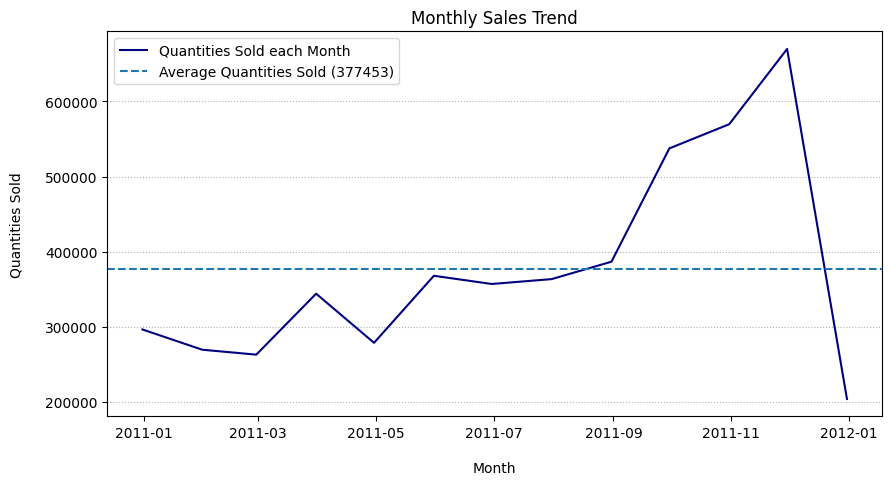

In [8]:
plt.figure(figsize=(10,5))
plt.plot(dfDateSum, color = 'navy', label = 'Quantities Sold each Month')
plt.axhline(dfDateSum.mean(), label = f'Average Quantities Sold ({round(dfDateSum.mean())})', linestyle = '--')
plt.title('Monthly Sales Trend')
plt.xlabel('Month', labelpad = 15)
plt.ylabel('Quantities Sold', labelpad = 15)
plt.grid(axis = 'y', linestyle = ":")
plt.legend()
plt.show()

# New Customers per Month

In [9]:
#New customers each month
dfDateIndex = df.set_index('InvoiceDate')
dfDateIndex['CustomerID'] = dfDateIndex['CustomerID'].astype(int)
dfDateIndexDrop = dfDateIndex.drop_duplicates(subset = 'CustomerID', keep = 'first')
dfNewCustomers = dfDateIndexDrop.resample('M')['CustomerID'].nunique()
dfUniqueCustomers = dfNewCustomers.reset_index()
dfUniqueCustomers.columns = ['Month', 'New Customers']

/tmp/ipykernel_33/1701039339.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dfNewCustomers = dfDateIndexDrop.resample('M')['CustomerID'].nunique()


In [10]:
dfUniqueCustomers

,Month,New Customers
0,2010-12-31,948
1,2011-01-31,421
2,2011-02-28,380
3,2011-03-31,440
4,2011-04-30,299
5,2011-05-31,279
6,2011-06-30,235
7,2011-07-31,191
8,2011-08-31,167
9,2011-09-30,298


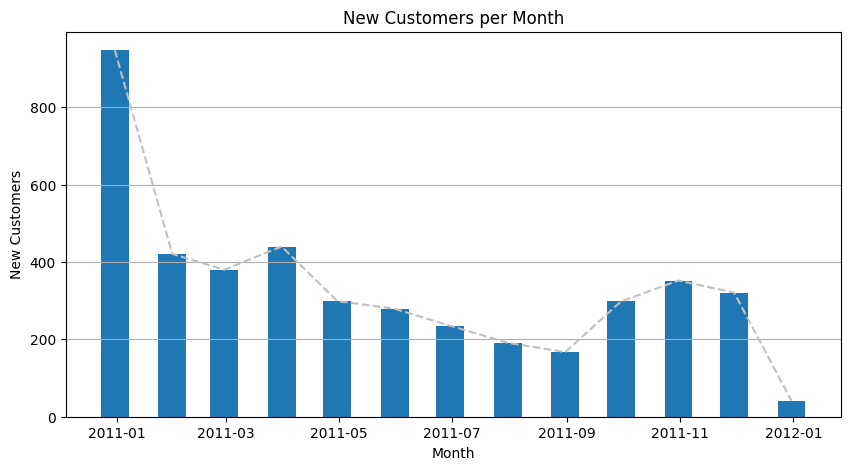

In [11]:
plt.figure(figsize=(10,5))
plt.plot(dfUniqueCustomers['Month'], dfUniqueCustomers['New Customers'], linestyle = '--', color = 'silver')
plt.bar(dfUniqueCustomers['Month'], dfUniqueCustomers['New Customers'], width = 15)
plt.title('New Customers per Month')
plt.xlabel('Month')
plt.ylabel('New Customers')
plt.grid(axis='y')
plt.show()

# Best Selling Products per Country

In [12]:
#Best selling product in each country
dfProductCountry = df.groupby(['Country', 'Description'])['Quantity'].sum()
dfProductCountry.reset_index()

,Country,Description,Quantity
0,Australia,DOLLY GIRL BEAKER,200
1,Australia,I LOVE LONDON MINI BACKPACK,4
2,Australia,10 COLOUR SPACEBOY PEN,48
3,Australia,12 PENCIL SMALL TUBE WOODLAND,384
4,Australia,12 PENCILS TALL TUBE POSY,252
...,...,...,...
19365,Unspecified,WRAP POPPIES DESIGN,25
19366,Unspecified,WRAP SUKI AND FRIENDS,25
19367,Unspecified,WRAP VINTAGE PETALS DESIGN,25
19368,Unspecified,WRAP WEDDING DAY,25


In [13]:
bestSellingProducts = dfProductCountry.groupby('Country').idxmax().str[1]
dfCountryVsProduct = bestSellingProducts.reset_index()
dfCountryVsProduct.columns=['Country', 'Best Selling Product']
dfCountryVsProduct

,Country,Best Selling Product
0,Australia,MINI PAINT SET VINTAGE
1,Austria,SET 12 KIDS COLOUR CHALK STICKS
2,Bahrain,ICE CREAM SUNDAE LIP GLOSS
3,Belgium,PACK OF 72 RETROSPOT CAKE CASES
4,Brazil,DOLLY GIRL LUNCH BOX
5,Canada,RETRO COFFEE MUGS ASSORTED
6,Channel Islands,RAIN PONCHO
7,Cyprus,HEART DECORATION PAINTED ZINC
8,Czech Republic,WOODEN STAR CHRISTMAS SCANDINAVIAN
9,Denmark,RED HARMONICA IN BOX


# Customers with Highest Orders

In [14]:
#Customers with Highest Order
customerQuantity = df.groupby('CustomerID')['Quantity'].sum()
customerQuantSort = customerQuantity.sort_values(ascending=False)
topCustomers = customerQuantSort.iloc[:20]
dfTopCustomers = topCustomers.reset_index()
dfTopCustomers

,CustomerID,Quantity
0,14646,196719
1,12415,77242
2,14911,77180
3,17450,69029
4,18102,64122
5,17511,63012
6,13694,61803
7,14298,58021
8,14156,57025
9,16684,49390


In [15]:
#Making sure negaitve quanities are in the data
df[df['Quantity'] < 0].sort_values(by='Quantity')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446,United Kingdom
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346,United Kingdom
4287,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,2010-12-02 14:23:00,0.03,15838,United Kingdom
160145,C550456,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,-3114,2011-04-18 13:08:00,2.10,15749,United Kingdom
160144,C550456,21175,GIN + TONIC DIET METAL SIGN,-2000,2011-04-18 13:08:00,1.85,15749,United Kingdom
...,...,...,...,...,...,...,...,...
349851,C567536,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,-1,2011-09-21 09:52:00,7.95,14284,United Kingdom
349871,C567540,23173,REGENCY TEAPOT ROSES,-1,2011-09-21 10:00:00,9.95,12384,Switzerland
176843,C552029,20982,12 PENCILS TALL TUBE SKULLS,-1,2011-05-05 18:11:00,0.85,15622,United Kingdom
176839,C552029,22681,FRENCH BLUE METAL DOOR SIGN 6,-1,2011-05-05 18:11:00,1.25,15622,United Kingdom


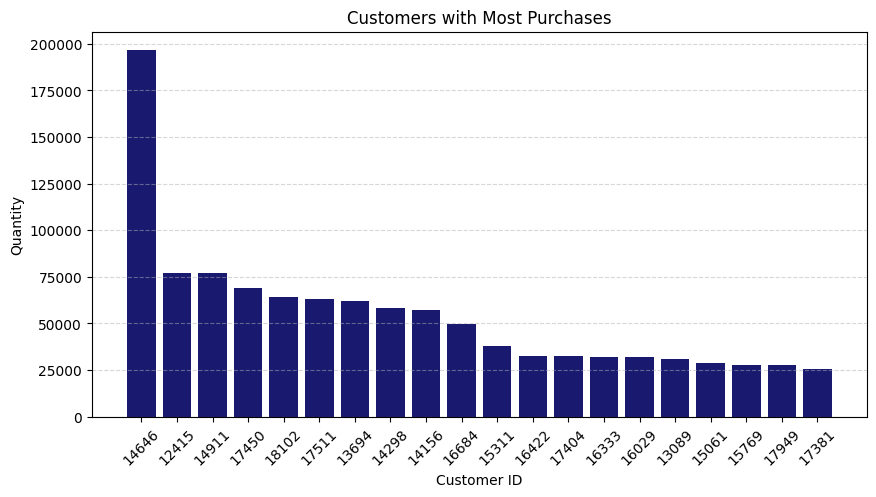

In [16]:
plt.figure(figsize = (10,5))
plt.bar(dfTopCustomers['CustomerID'], dfTopCustomers['Quantity'], label = 'Quantities Purchased', color = 'midnightblue')
plt.title('Customers with Most Purchases')
plt.ylabel('Quantity')
plt.xlabel('Customer ID')
plt.xticks(rotation = 45)
plt.grid(axis = 'y', linestyle = '--', alpha = 0.5)
plt.show()

# Finding the Countries of the Top Customers

In [17]:
#Countries of Top Customers
customerCountry = df.groupby(['CustomerID', 'Country'])['Quantity'].sum()
sortCustomerCountry = customerCountry.sort_values(ascending = False)
topCustomers = sortCustomerCountry.iloc[:20]
topCustomers.reset_index()

,CustomerID,Country,Quantity
0,14646,Netherlands,196719
1,12415,Australia,77242
2,14911,EIRE,77180
3,17450,United Kingdom,69029
4,18102,United Kingdom,64122
5,17511,United Kingdom,63012
6,13694,United Kingdom,61803
7,14298,United Kingdom,58021
8,14156,EIRE,57025
9,16684,United Kingdom,49390


# Finding the Hour Most Purchases Occur at

In [18]:
#When do most purchases occur (hour)

dfCopy = df
dfCopy['Hours'] = dfCopy['InvoiceDate'].dt.hour
hourQuantity = dfCopy.groupby('Hours')['Quantity'].sum()
dfHourQuantity = hourQuantity.reset_index()
dfHourQuantity

,Hours,Quantity
0,6,-86
1,7,15361
2,8,157310
3,9,396009
4,10,686906
5,11,629094
6,12,815693
7,13,665148
8,14,537569
9,15,543410


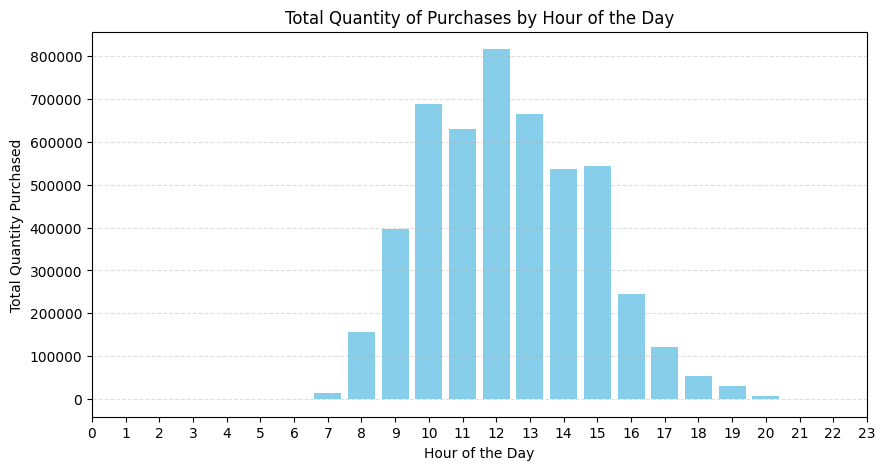

In [19]:
plt.figure(figsize = (10, 5))
plt.bar(dfHourQuantity['Hours'], dfHourQuantity['Quantity'], label = 'Quantity', color = 'skyblue')
plt.title('Total Quantity of Purchases by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.xticks(range(0, 24))
plt.ylabel('Total Quantity Purchased')
plt.grid(axis = 'y', linestyle = '--', alpha = 0.4)
plt.show()